# Example 3

In [1]:
import gemgis as gg

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import geopandas as gpd
import rasterio 

In [3]:
topo = gpd.read_file('topo3.shp')
topo.head()

,id,Z,geometry
0,None,800,"LINESTRING (6.948 674.298, 97.151 781.847, 168..."
1,None,900,"LINESTRING (10.418 291.517, 78.648 414.099, 12..."
2,None,1100,"LINESTRING (978.357 1207.417, 1009.581 1271.02..."
3,None,1000,"LINESTRING (834.959 1363.536, 882.373 1447.956..."
4,None,1100,"LINESTRING (1778.613 2.407, 1712.696 100.704, ..."


In [4]:
topo_raster = gg.vector.interpolate_raster(gdf=topo, value='Z', method='rbf', res=15)


C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\scipy\interpolate\rbf.py:257: LinAlgWarning: Ill-conditioned matrix (rcond=3.63257e-33): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


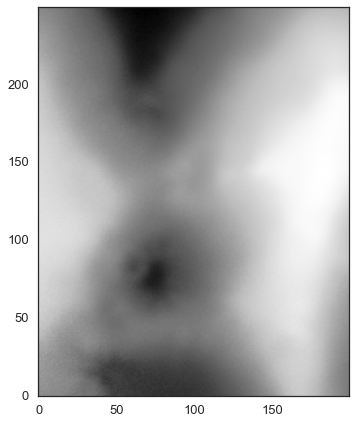

In [5]:
import matplotlib.pyplot as plt
plt.imshow(topo_raster, origin='lower')

In [6]:
topo_raster = rasterio.open('raster3.tif')

In [7]:
interfaces = gpd.read_file('interfaces3.shp')
interfaces.head()

,id,formation,geometry
0,None,B,"LINESTRING (2.323 3499.479, 65.927 3338.734, 1..."
1,None,C,"LINESTRING (389.730 3730.767, 463.742 3570.022..."
2,None,C,"LINESTRING (2067.723 2331.475, 2214.591 2427.4..."
3,None,D,"LINESTRING (2522.204 3256.627, 2393.839 3180.3..."
4,None,E,"LINESTRING (2389.213 3623.218, 2259.692 3551.5..."


In [8]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=topo_raster)
interfaces_coords = interfaces_coords.sort_values(by='formation', ascending=False)
interfaces_coords

,formation,geometry,X,Y,Z
169,F,POINT (932.100 3354.924),932.10,3354.92,1214.19
170,F,POINT (914.753 3459.004),914.75,3459.00,1213.03
181,F,POINT (1630.589 267.231),1630.59,267.23,1085.09
180,F,POINT (1527.666 276.483),1527.67,276.48,1101.00
179,F,POINT (1417.804 261.449),1417.80,261.45,1118.56
...,...,...,...,...,...
17,B,POINT (238.236 761.031),238.24,761.03,854.53
18,B,POINT (161.911 615.320),161.91,615.32,870.34
19,B,POINT (83.273 463.826),83.27,463.83,886.53
20,B,POINT (11.574 307.707),11.57,307.71,895.69


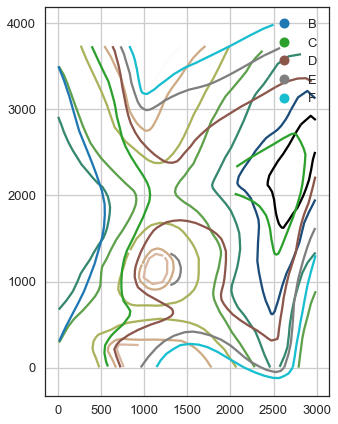

In [9]:
fig, ax = plt.subplots(1)

topo.plot(ax=ax, column='Z', cmap='gist_earth', aspect='equal')
interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')

plt.grid()

In [10]:
strikes = gpd.read_file('strikes3.shp')
strikes

,id,formation,Z,geometry
0,2,C,700,"LINESTRING (2236.563 2441.337, 2244.658 1935.973)"
1,1,C,600,"LINESTRING (2752.335 2715.413, 2750.022 1809.921)"
2,2,D,800,"LINESTRING (2242.924 3096.460, 2290.338 441.276)"
3,3,D,900,"LINESTRING (1739.873 2780.752, 1758.376 1605.810)"
4,4,D,1000,"LINESTRING (1236.822 2394.501, 1239.134 1677.509)"
5,4,E,1100,"LINESTRING (1245.495 953.000, 1236.243 3100.507)"
6,3,E,1000,"LINESTRING (1749.124 3284.381, 1790.756 364.372)"
7,2,E,900,"LINESTRING (2242.345 63.698, 2259.692 3551.519)"
8,1,F,1000,"LINESTRING (2012.214 86.827, 2005.275 3738.862)"
9,2,F,1100,"LINESTRING (1534.026 272.435, 1499.911 3496.010)"


In [11]:
orientations_b = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='B'].sort_values(by='Z', ascending=True).reset_index())
orientations_b

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,11.70,89.81,850.00,POINT (249.918 1846.723),1.00,B,249.92,1846.72


In [12]:
orientations_c = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='C'].sort_values(by='Z', ascending=True).reset_index())
orientations_c

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,11.19,89.89,650.00,POINT (2495.895 2225.661),1.00,C,2495.89,2225.66
1,11.52,89.05,750.00,POINT (1995.068 2191.652),1.00,C,1995.07,2191.65
2,11.12,89.28,850.00,POINT (1493.850 2115.649),1.00,C,1493.85,2115.65
3,11.52,89.38,950.00,POINT (993.522 1819.555),1.00,C,993.52,1819.56


In [13]:
orientations_d = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='D'].sort_values(by='Z', ascending=True).reset_index())
orientations_d

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,11.82,89.31,750.00,POINT (2508.406 2059.226),1.00,D,2508.41,2059.23
1,11.12,89.00,850.00,POINT (2007.877 1981.074),1.00,D,2007.88,1981.07
2,11.11,89.29,950.00,POINT (1493.551 2114.643),1.00,D,1493.55,2114.64


In [14]:
orientations_e = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='E'].sort_values(by='Z', ascending=True).reset_index())
orientations_e

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,11.53,90.21,850.00,POINT (2499.375 2051.039),1.00,E,2499.38,2051.04
1,12.45,89.83,950.00,POINT (2010.479 1815.993),1.00,E,2010.48,1815.99
2,10.98,89.38,1050.00,POINT (1505.405 1925.565),1.00,E,1505.40,1925.57


In [15]:
orientations_f = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='F'].sort_values(by='Z', ascending=True).reset_index())
orientations_f

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,11.82,89.67,1050.00,POINT (1762.857 1898.533),1.00,F,1762.86,1898.53


In [16]:
import pandas as pd
orientations = pd.concat([orientations_b, orientations_c, orientations_d, orientations_e, orientations_f]).reset_index()
orientations = orientations[orientations['formation'].isin(['F', 'E', 'D', 'C', 'B'])]
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,11.70,89.81,850.00,POINT (249.918 1846.723),1.00,B,249.92,1846.72
1,0,11.19,89.89,650.00,POINT (2495.895 2225.661),1.00,C,2495.89,2225.66
2,1,11.52,89.05,750.00,POINT (1995.068 2191.652),1.00,C,1995.07,2191.65
3,2,11.12,89.28,850.00,POINT (1493.850 2115.649),1.00,C,1493.85,2115.65
4,3,11.52,89.38,950.00,POINT (993.522 1819.555),1.00,C,993.52,1819.56
5,0,11.82,89.31,750.00,POINT (2508.406 2059.226),1.00,D,2508.41,2059.23
6,1,11.12,89.00,850.00,POINT (2007.877 1981.074),1.00,D,2007.88,1981.07
7,2,11.11,89.29,950.00,POINT (1493.551 2114.643),1.00,D,1493.55,2114.64
8,0,11.53,90.21,850.00,POINT (2499.375 2051.039),1.00,E,2499.38,2051.04
9,1,12.45,89.83,950.00,POINT (2010.479 1815.993),1.00,E,2010.48,1815.99


In [17]:
import numpy as np 
orientations['dip'] = np.abs(orientations['dip'].values)
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,11.70,89.81,850.00,POINT (249.918 1846.723),1.00,B,249.92,1846.72
1,0,11.19,89.89,650.00,POINT (2495.895 2225.661),1.00,C,2495.89,2225.66
2,1,11.52,89.05,750.00,POINT (1995.068 2191.652),1.00,C,1995.07,2191.65
3,2,11.12,89.28,850.00,POINT (1493.850 2115.649),1.00,C,1493.85,2115.65
4,3,11.52,89.38,950.00,POINT (993.522 1819.555),1.00,C,993.52,1819.56
5,0,11.82,89.31,750.00,POINT (2508.406 2059.226),1.00,D,2508.41,2059.23
6,1,11.12,89.00,850.00,POINT (2007.877 1981.074),1.00,D,2007.88,1981.07
7,2,11.11,89.29,950.00,POINT (1493.551 2114.643),1.00,D,1493.55,2114.64
8,0,11.53,90.21,850.00,POINT (2499.375 2051.039),1.00,E,2499.38,2051.04
9,1,12.45,89.83,950.00,POINT (2010.479 1815.993),1.00,E,2010.48,1815.99


In [18]:
import gempy as gp

In [19]:
geo_model = gp.create_model('Model3')
geo_model

Model3  2021-03-28 13:01

In [20]:
gp.init_data(geo_model, [0,3000,0,3740,200,1200], [75,75,75],
             surface_points_df = interfaces_coords[interfaces_coords['Z']!=0],
             orientations_df = orientations,
             default_values=True)

Active grids: ['regular']


Model3  2021-03-28 13:01

In [21]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,F,Default series,1,#015482,1
1,E,Default series,2,#9f0052,2
2,D,Default series,3,#ffbe00,3
3,C,Default series,4,#728f02,4
4,B,Default series,5,#443988,5


In [22]:
gp.map_stack_to_surfaces(geo_model,
                         {                             
                          'Strata1': ('F'),
                          'Strata2': ('E'),
                          'Strata3': ('D'),
                          'Strata4': ('C'),
                          'Strata5': ('B'),
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('A')

,surface,series,order_surfaces,color,id
0,F,Strata1,1,#015482,1
1,E,Strata2,1,#9f0052,2
2,D,Strata3,1,#ffbe00,3
3,C,Strata4,1,#728f02,4
4,B,Strata5,1,#443988,5
5,A,Strata5,2,#ff3f20,6


In [23]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
0,F,Strata1,1,#015482,1,45,1
1,E,Strata2,1,#9f0052,2,68,3
2,D,Strata3,1,#ffbe00,3,113,3
3,C,Strata4,1,#728f02,4,77,4
4,B,Strata5,1,#443988,5,21,1
5,A,Strata5,2,#ff3f20,6,0,0


In [24]:
custom_section = gpd.read_file('customsection3.shp')
custom_section_dict = gg.utils.to_section_dict(custom_section, section_column='name')
geo_model.set_section_grid(custom_section_dict)

Active grids: ['regular' 'sections']


,start,stop,resolution,dist
Section1,"[15.217892876134727, 1063.5514258527073]","[2991.4655480049296, 1046.4043200206897]","[100, 80]",2976.30


In [25]:
geo_model.set_topography(
    source='gdal', filepath='raster3.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography' 'sections']


Grid Object. Values: 
array([[  20.        ,   24.93333333,  206.66666667],
       [  20.        ,   24.93333333,  220.        ],
       [  20.        ,   24.93333333,  233.33333333],
       ...,
       [2991.465548  , 1046.40432002, 1174.6835443 ],
       [2991.465548  , 1046.40432002, 1187.34177215],
       [2991.465548  , 1046.40432002, 1200.        ]])

In [26]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range                    4897.71
$C_o$                  571133.33
drift equations  [3, 3, 3, 3, 3]


In [27]:
sol = gp.compute_model(geo_model, compute_mesh=True)

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\core\solution.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.geological_map = np.array([values[0][:, l0: l1], values[4][:, l0: l1].astype(float)])
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\core\solution.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.sections = np.array([values[0][:, l0: l1], values[4][:, l0: l1].astype(float)])


C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


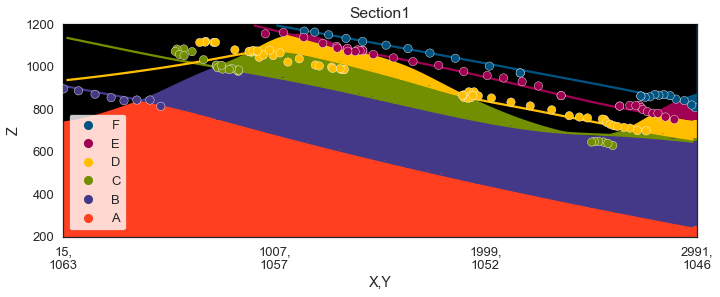

In [28]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True)

In [ ]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=False, show_lith=True)